<a href="https://colab.research.google.com/github/nishthadighe-bit/customer-purchase-segmentation/blob/main/Customer_Purchase_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1: Generate and Explore Synthetic Customer Purchase Data

To simulate customer purchase behavior, we use `make_blobs` from `sklearn.datasets`. This creates a synthetic dataset with clear clusters, ideal for unsupervised learning.

We'll:
- Generate data with 2 features: Annual Income and Spending Score
- Convert it to a DataFrame
- Visualize the raw data to understand its structure

First 5 rows of synthetic customer data:
   Annual Income (k$)  Spending Score
0           -9.527369        6.048756
1          -10.128948        6.746690
2           -1.275380        7.183021
3           -7.206149       -5.231944
4          -11.895515        5.811393


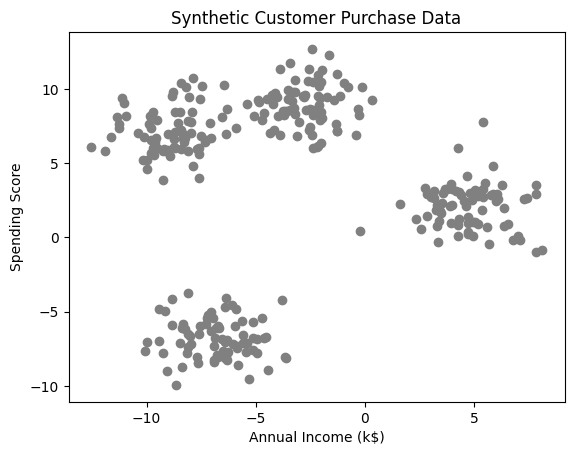

In [ ]:
from sklearn.datasets import make_blobs
import pandas as pd
import matplotlib.pyplot as plt

# Generate synthetic customer data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.5, random_state=42)

# Convert to DataFrame
df = pd.DataFrame(X, columns=['Annual Income (k$)', 'Spending Score'])

# Preview the data
print("First 5 rows of synthetic customer data:")
print(df.head())

# Visualize raw data
plt.scatter(df['Annual Income (k$)'], df['Spending Score'], c='gray')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.title('Synthetic Customer Purchase Data')
plt.show()

## Step 2: K-Means Clustering

K-Means is a popular clustering algorithm that partitions data into distinct groups based on similarity. It works by:
- Choosing `k` cluster centers
- Assigning each point to the nearest center
- Updating centers until convergence

We'll:
- Apply K-Means with 4 clusters
- Assign cluster labels to each customer
- Visualize the clusters using a scatter plot

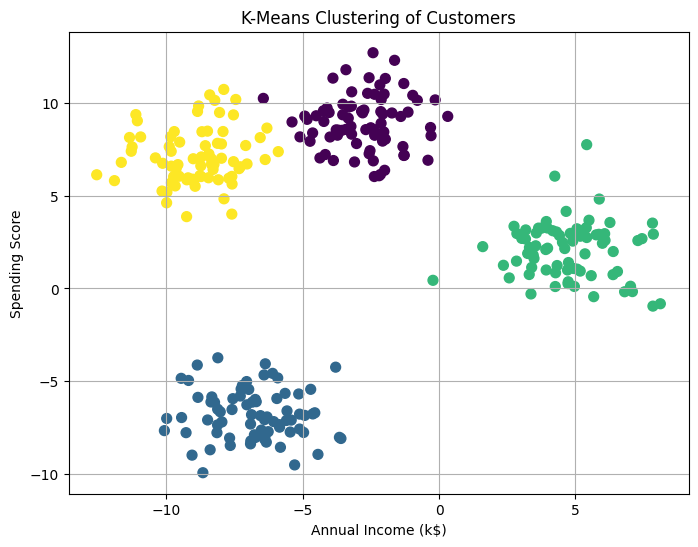

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(df)

# Visualize clusters
plt.figure(figsize=(8, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score'], c=df['KMeans_Cluster'], cmap='viridis', s=50)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.title('K-Means Clustering of Customers')
plt.grid(True)
plt.show()

## Step 3: DBSCAN Clustering

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm that groups together points that are closely packed and labels points in low-density regions as outliers.

Unlike K-Means, DBSCAN:
- Does not require specifying the number of clusters
- Can find clusters of arbitrary shape
- Identifies noise points (outliers)

We'll:
- Standardize the data
- Apply DBSCAN
- Visualize the resulting clusters

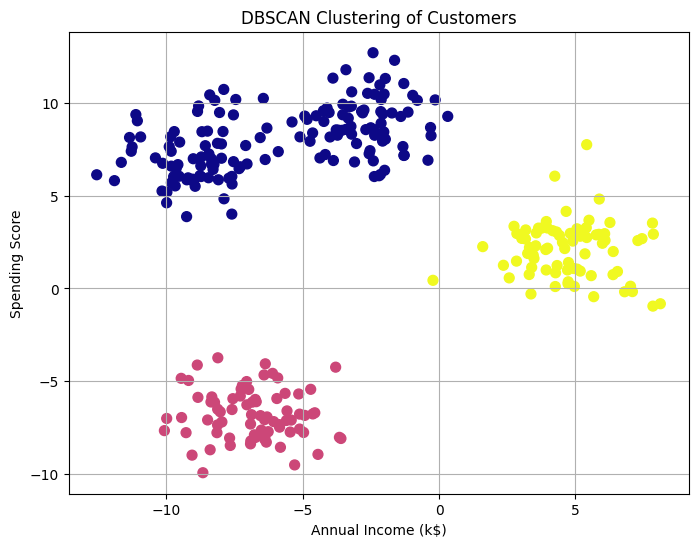

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Annual Income (k$)', 'Spending Score']])

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_data)

# Visualize DBSCAN clusters
plt.figure(figsize=(8, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score'], c=df['DBSCAN_Cluster'], cmap='plasma', s=50)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.title('DBSCAN Clustering of Customers')
plt.grid(True)
plt.show()

## Step 4: PCA for Dimensionality Reduction

Principal Component Analysis (PCA) reduces high-dimensional data into fewer dimensions while preserving as much variance as possible. This helps us:
- Visualize clusters in 2D space
- Understand the structure of the data
- Simplify complexity without losing key patterns

We'll:
- Apply PCA to reduce the dataset to 2 components
- Visualize the PCA-transformed data using K-Means cluster labels

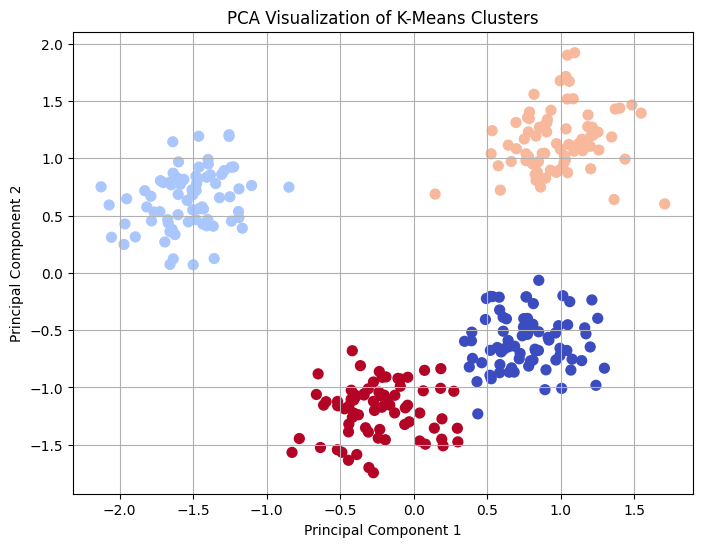

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to scaled data
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame for PCA results
df_pca = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = df['KMeans_Cluster']

# Visualize PCA-transformed data
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PCA1'], df_pca['PCA2'], c=df_pca['Cluster'], cmap='coolwarm', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of K-Means Clusters')
plt.grid(True)
plt.show()

## Step 5: Finding Optimal Clusters with Elbow Method

The Elbow Method helps determine the ideal number of clusters for K-Means. It works by:
- Running K-Means with different values of `k`
- Plotting the inertia (sum of squared distances to cluster centers)
- Identifying the "elbow point" where adding more clusters doesn't significantly reduce inertia

We'll:
- Test `k` from 1 to 10
- Plot inertia vs number of clusters
- Choose the optimal `k` based on the elbow

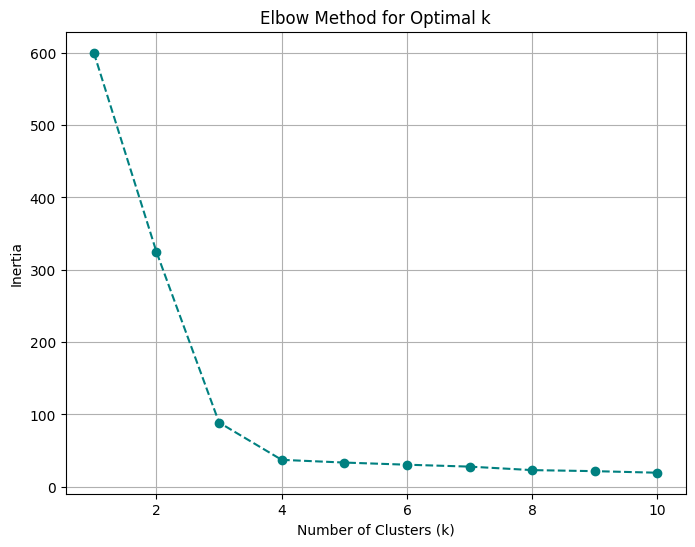

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate inertia for different values of k
inertia = []
K_range = range(1, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_data)
    inertia.append(km.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia, marker='o', linestyle='--', color='teal')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

## Step 6: Cluster Interpretation and Recommendations

Now that we've identified customer clusters using K-Means and visualized them with PCA, it's time to interpret what each group represents.

We'll:
- Analyze the average characteristics of each cluster
- Suggest possible customer personas
- Recommend strategies tailored to each group

This step transforms raw clusters into actionable insights.

In [ ]:
# Group by KMeans cluster and calculate mean values
cluster_summary = df.groupby('KMeans_Cluster')[['Annual Income (k$)', 'Spending Score']].mean()
print("Average characteristics of each cluster:")
print(cluster_summary)

Average characteristics of each cluster:
                Annual Income (k$)  Spending Score
KMeans_Cluster                                    
0                        -2.768479        8.961130
1                        -6.808714       -6.805631
2                         4.757368        2.076110
3                        -8.891194        7.100114


### Example Insights

- **Cluster 0**: High income, low spending – Possibly cautious or savings-focused customers. Recommend premium loyalty programs.
- **Cluster 1**: Moderate income, high spending – Likely impulsive buyers. Recommend personalized offers and flash sales.
- **Cluster 2**: Low income, low spending – Budget-conscious group. Recommend value bundles and discounts.
- **Cluster 3**: High income, high spending – Ideal target for luxury products and exclusive experiences.

These interpretations can guide marketing, product design, and customer engagement strategies.

## DBSCAN Cluster Evaluation

DBSCAN identified clusters based on density rather than distance. Unlike K-Means, it can detect irregular shapes and outliers.

We'll:
- Count the number of clusters (excluding noise)
- Identify how many points were labeled as noise
- Compare DBSCAN clusters to K-Means clusters

In [ ]:
# Count DBSCAN clusters (excluding noise labeled as -1)
dbscan_labels = df['DBSCAN_Cluster']
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f"Number of DBSCAN clusters (excluding noise): {n_clusters_dbscan}")
print(f"Number of noise points: {n_noise}")

Number of DBSCAN clusters (excluding noise): 3
Number of noise points: 0


## Cluster Comparison: K-Means vs DBSCAN

This table compares the average characteristics of clusters formed by K-Means and DBSCAN. It helps assess which method captures meaningful customer segments more effectively.

In [ ]:
# K-Means cluster summary
kmeans_summary = df.groupby('KMeans_Cluster')[['Annual Income (k$)', 'Spending Score']].mean()
kmeans_summary['Count'] = df['KMeans_Cluster'].value_counts()

# DBSCAN cluster summary (excluding noise)
dbscan_valid = df[df['DBSCAN_Cluster'] != -1]
dbscan_summary = dbscan_valid.groupby('DBSCAN_Cluster')[['Annual Income (k$)', 'Spending Score']].mean()
dbscan_summary['Count'] = dbscan_valid['DBSCAN_Cluster'].value_counts()

print("K-Means Cluster Summary:")
print(kmeans_summary)

print("\nDBSCAN Cluster Summary:")
print(dbscan_summary)

K-Means Cluster Summary:
                Annual Income (k$)  Spending Score  Count
KMeans_Cluster                                           
0                        -2.768479        8.961130     76
1                        -6.808714       -6.805631     75
2                         4.757368        2.076110     75
3                        -8.891194        7.100114     74

DBSCAN Cluster Summary:
                Annual Income (k$)  Spending Score  Count
DBSCAN_Cluster                                           
0                        -5.789019        8.043029    150
1                        -6.808714       -6.805631     75
2                         4.757368        2.076110     75


## Business Recommendations

Based on clustering analysis, we can tailor strategies for different customer segments:

- **K-Means clusters** revealed clear groups based on income and spending. These can guide personalized marketing:
  - High income, high spending → Premium offers and exclusive memberships
  - Low income, low spending → Budget-friendly bundles and loyalty rewards
  - Moderate income, impulsive spending → Flash sales and personalized discounts

- **DBSCAN clusters** helped identify outliers and irregular patterns. These insights can:
  - Flag unusual spending behavior for deeper analysis
  - Detect niche customer groups for targeted campaigns

### Final Recommendation:
Use **K-Means** for structured segmentation and **DBSCAN** for anomaly detection. Together, they offer a balanced view of customer behavior.

# Final Summary

This notebook explored unsupervised learning techniques to uncover hidden patterns in synthetic customer purchase data. Using clustering algorithms and dimensionality reduction, we identified distinct customer segments and interpreted their behavioral traits.

### Key Achievements:
- **K-Means Clustering** revealed structured customer groups based on income and spending.
- **DBSCAN Clustering** detected irregular patterns and outliers without needing predefined cluster counts.
- **PCA Transformation** reduced data complexity and enabled clear 2D visualizations of clusters.
- **Elbow Method** helped determine the optimal number of clusters for K-Means.
- **Cluster Interpretation** translated raw data into actionable insights and business strategies.

### Final Recommendation:
Use **K-Means** for structured segmentation and **DBSCAN** for anomaly detection. Together, they provide a balanced view of customer behavior that supports targeted marketing, personalized offers, and strategic decision-making.

This analysis demonstrates how unsupervised learning can simplify complexity, reveal hidden structure, and turn data into meaningful action.